#Proyecto Final
*Data Science I : Fundamentos para la Ciencia de Datos*

Fecha: 20/07/2024

Objetivos:

Estudio de Modelos Análiticos

Crear un notebook que complemente el trabajo realizado en los siguientes apartados:

I) Elegir un método de feature selection para reducir la dimensionalidad del dataset.

II) Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.

III) Cálculo de métricas básicas para validar el modelo.

IV) Generar conclusiones con base en los resultados obtenidos.






**Abstract**

*   El conjunto de Datos brinda información sobre las Ventas de vehículos realizadas durante los Años 2022 y 2023. El dataset brinda información útil que puede ser analizada por la Empresa, por ejemplo, tenemos la Fecha de venta, con esa información podremos saber la época en la cual las personas están más dispuestas a adquirir un vehículo, ésta información resulta útil ya que una Empresa determinada puede aumentar la publicidad o generar promociones para atraer a más clientes o para reforzar la publicidad en épocas donde existen menos ventas. También se detalla información sobre la marca de Vehículo que se adquirió, aquí podemos conocer si las personas se inclinan más sobre una marca en particular, analizar que está haciendo esa marca para que los compradores se inclinen por un vehículo de dicha Empresa, que tipo de publicidad utilizan a los fines de que si pertenezco a la competencia elaborar los planes necesarios para obtener mayores clientes. Los ingresos Anuales de cada comprador, con esta información podremos conocer si las personas con mayores ingresos se inclinan por vehículos más caros. El género, con ello conoceremos si hay mayor predisposición de compra por parte de Hombres o Mujeres, además nos podrá brindar información sobre preferencias al momento de escoger un modelo de vehículo en particular, el color nos puede ayudar al momento de la publicidad, por ejemplo, si existe mucha demanda por el color blanco, ello brinda a la empresa información al momento de hacer publicidad, el color del vehículo que aparezca debe ser blanco para atraer al comprador, etc. Con éste dataset se buscará encontrar cualquier tipo de relación e información que motive la compra o adquisición de una marca o un vehículo en particular, a los fines de generar información valiosa para la Empresa y los vendedores
*   El conjunto de datos fue obtenido de: https://www.kaggle.com/datasets/missionjee/car-sales-report





Hipotesis:
1.   Las personas de mayores Ingresos adquieren los vehiculos cuyos precios son mas elevado
2.   La Empresa que más vehículos vendió entre el 2022 y 2023 fué Ford
3.   Los Hombres compran mas vehículos anuales que las Mujeres
4.   El color de auto mas vendido es Negro
5.   Los compradores prefieren vehículos de Transmisión  automática por sobre la Manual
6.   La época donde mas vehículos se adquieren es a principios de mes,basicamente los meses de Enero o Febrero




Importamos Libreria Pandas

In [1]:
import pandas as pd

Importamos el Dataset

In [2]:
df = pd.read_excel("/content/CSV_CAR_SALE.xls")

In [3]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
df.columns


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [5]:
df.columns = ["Identificacion_auto", "Fecha", "Nombre_Cliente", "Genero", "Ingreso_Anual", "Nombre_vendedor", "Compañia", "Modelo", "Motor", "Transmisión", "Color", "Precio", "Número_vendedor", "Estilo_vehiculo", "Teléfono", "Región_vendedor"]
print(df)

      Identificacion_auto      Fecha Nombre_Cliente  Genero  Ingreso_Anual  \
0            C_CND_000001 2022-01-02      Geraldine    Male          13500   
1            C_CND_000002 2022-01-02            Gia    Male        1480000   
2            C_CND_000003 2022-01-02         Gianna    Male        1035000   
3            C_CND_000004 2022-01-02        Giselle    Male          13500   
4            C_CND_000005 2022-01-02          Grace    Male        1465000   
...                   ...        ...            ...     ...            ...   
23901        C_CND_023902 2023-12-31         Martin    Male          13500   
23902        C_CND_023903 2023-12-31          Jimmy  Female         900000   
23903        C_CND_023904 2023-12-31           Emma    Male         705000   
23904        C_CND_023905 2023-12-31       Victoire    Male          13500   
23905        C_CND_023906 2023-12-31        Donovan    Male        1225000   

                           Nombre_vendedor   Compañia      Mode

Renombramos una de las columnas

Pre visualización del Data Set

In [6]:
df.describe()

,Fecha,Ingreso_Anual,Precio,Teléfono
count,23906,2.390600e+04,23906.000000,2.390600e+04
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846,7.497741e+06
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746495e+06
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496198e+06
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000,8.248146e+06
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06
std,NaN,7.200064e+05,14788.687608,8.674920e+05


Modificamos algunos datos que figuran erroneos

In [7]:
df["Ingreso_Anual"] = df["Ingreso_Anual"].astype("float64")
pd.set_option("display.float_format", lambda x: "%.f" % x)

In [8]:
df.describe()

,Fecha,Ingreso_Anual,Precio,Teléfono
count,23906,23906,23906,23906
mean,2023-03-01 14:28:10.822387456,830840,28090,7497741
min,2022-01-02 00:00:00,10080,1200,6000101
25%,2022-09-20 00:00:00,386000,18001,6746495
50%,2023-03-13 00:00:00,735000,23000,7496198
75%,2023-09-08 00:00:00,1175750,34000,8248146
max,2023-12-31 00:00:00,11200000,85800,8999579
std,NaN,720006,14789,867492


Agregamos solo las columnas con números que nos interesan para la realización de Cálculos

In [9]:
columnas_a_incluir = df.columns.difference(["Fecha", "Teléfono"])
df[columnas_a_incluir].describe()

,Ingreso_Anual,Precio
count,23906,23906
mean,830840,28090
std,720006,14789
min,10080,1200
25%,386000,18001
50%,735000,23000
75%,1175750,34000
max,11200000,85800


In [10]:
df.head()

,Identificacion_auto,Fecha,Nombre_Cliente,Genero,Ingreso_Anual,Nombre_vendedor,Compañia,Modelo,Motor,Transmisión,Color,Precio,Número_vendedor,Estilo_vehiculo,Teléfono,Región_vendedor
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [11]:
df.shape

(23906, 16)

In [12]:
df.tail()

,Identificacion_auto,Fecha,Nombre_Cliente,Genero,Ingreso_Anual,Nombre_vendedor,Compañia,Modelo,Motor,Transmisión,Color,Precio,Número_vendedor,Estilo_vehiculo,Teléfono,Región_vendedor
23901,C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÃ‚Â Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÃ‚Â Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,2023-12-31,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÃ‚Â Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [13]:
df.columns

Index(['Identificacion_auto', 'Fecha', 'Nombre_Cliente', 'Genero',
       'Ingreso_Anual', 'Nombre_vendedor', 'Compañia', 'Modelo', 'Motor',
       'Transmisión', 'Color', 'Precio', 'Número_vendedor', 'Estilo_vehiculo',
       'Teléfono', 'Región_vendedor'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Identificacion_auto  23906 non-null  object        
 1   Fecha                23906 non-null  datetime64[ns]
 2   Nombre_Cliente       23905 non-null  object        
 3   Genero               23906 non-null  object        
 4   Ingreso_Anual        23906 non-null  float64       
 5   Nombre_vendedor      23906 non-null  object        
 6   Compañia             23906 non-null  object        
 7   Modelo               23906 non-null  object        
 8   Motor                23906 non-null  object        
 9   Transmisión          23906 non-null  object        
 10  Color                23906 non-null  object        
 11  Precio               23906 non-null  int64         
 12  Número_vendedor      23906 non-null  object        
 13  Estilo_vehiculo      23906 non-

In [15]:
contar_datos_nulos = df.isnull().sum()
contar_datos_nulos

Identificacion_auto    0
Fecha                  0
Nombre_Cliente         1
Genero                 0
Ingreso_Anual          0
Nombre_vendedor        0
Compañia               0
Modelo                 0
Motor                  0
Transmisión            0
Color                  0
Precio                 0
Número_vendedor        0
Estilo_vehiculo        0
Teléfono               0
Región_vendedor        0
dtype: int64

Observamos que hay un valor nulo en Nombre_Cliente, sin embargo, será una columna que no se utilizará para el análisis por lo que no se considera realizar ningún tipo de modificacion u operación

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

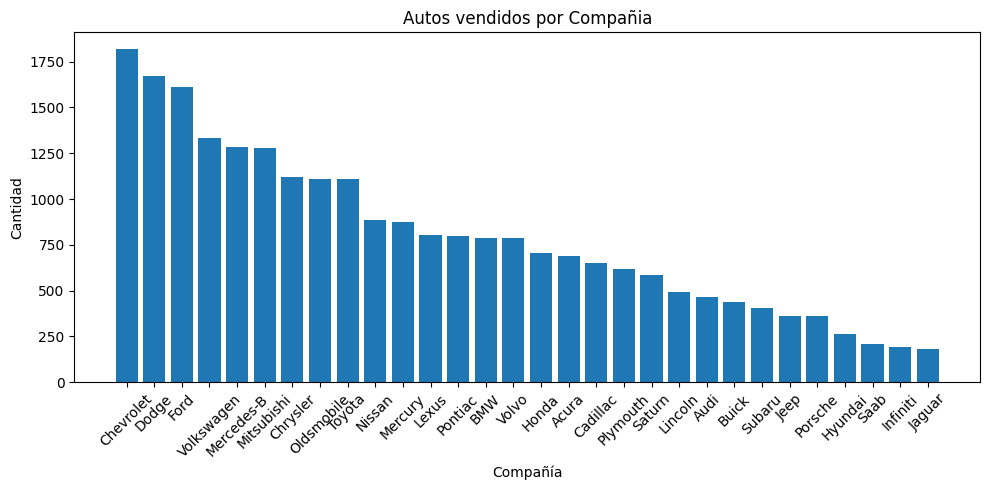

In [17]:
conteo_compañias = df["Compañia"].value_counts()
# Gráfico de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico
plt.bar(conteo_compañias.index, conteo_compañias.values)

plt.title("Autos vendidos por Compañia")
plt.xlabel("Compañía")
plt.ylabel("Cantidad")

plt.xticks(rotation=45) # Rotar las etiquetas del eje x para mejor visualización

plt.tight_layout()
plt.show()

Aquí podemos observar que la Empresa que mas vehiculos vendió en los dos años fue Chevrolet, Ford fue la tercera que mas vendió. Dentro de nuestra hipótesis Ford termina siendo una Empresa muy competitiva que con el tiempo puede lograr el objetivo de ser la Primera en ventas totales anuales

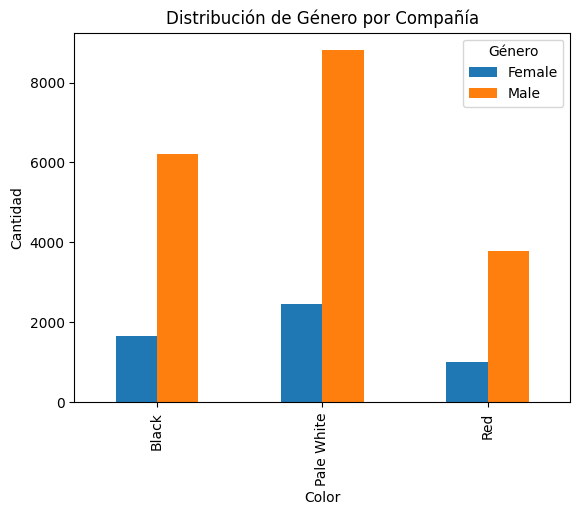

In [18]:
# Agrupamos datos por compañía y genero
conteo_gender_company = df.groupby(["Color", "Genero"]).size().unstack()

conteo_gender_company.plot(kind="bar") # Creamos el gráfico de barras agrupadas

plt.title("Distribución de Género por Compañía")
plt.xlabel("Color")
plt.ylabel("Cantidad")
plt.legend(title="Género")

plt.show()

Se observa que el color mas adquirido por los compradores es el Blanco, sin importar el género

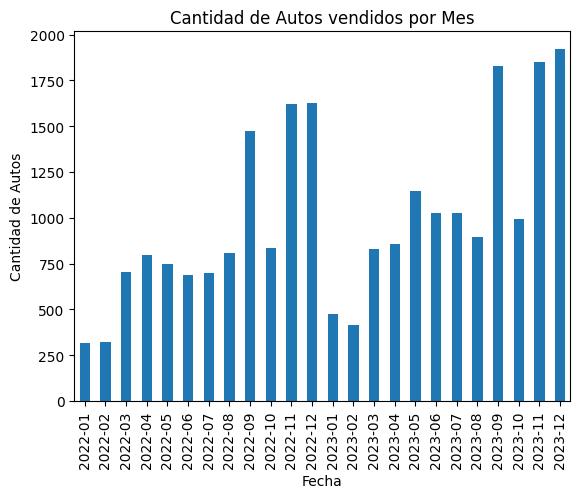

In [19]:
# Primero nos aseguramos que la columna date tenga formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])
# Agrupamos datos por mes
conteo_mensual = df.groupby([df["Fecha"].dt.to_period("M")]).size()
conteo_mensual.plot(kind="bar", stacked=True)

plt.title("Cantidad de Autos vendidos por Mes")
plt.ylabel("Cantidad de Autos")

plt.show()

Se puede Observar que tanto en el Año 2022 cómo en el 2023 los meses de mayores compras de vehículos son en Septiembre, Noviembre y Diciembre, también se observa que Enero y Febrero es muy bajo el nivel de compra, ésto puede deberse a vacaciones de las personas, que para ellos priorizan la compra a fines del año anterior, en esos meses se podria reforzar la promoción por parte de las Empresas a los fines de atraer clientes

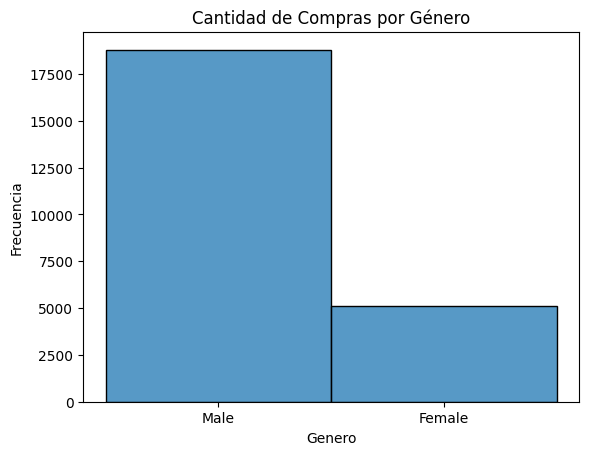

In [20]:
# Seleccionamos la columna a graficar
sns.histplot(data=df, x="Genero")

plt.title("Cantidad de Compras por Género")
plt.xlabel("Genero")
plt.ylabel("Frecuencia")

plt.show()

Se observa que hay una gran mayoria de Hombres que adquieren vehiculos en comparación a las mujeres

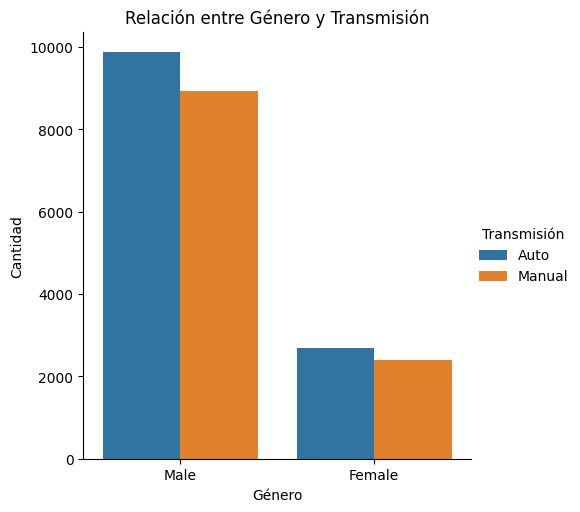

In [21]:
# Creo un gráfico de barras bivariado con 'Gender' y 'Transmission'
sns.catplot(x="Genero", hue="Transmisión", kind= "count", data=df)

plt.title("Relación entre Género y Transmisión")
plt.xlabel("Género")
plt.ylabel("Cantidad")

plt.show()

Se consideró en un primer momento que Gender = Female iban a estar mas interesados en el tipo de Transmission = Auto, sin embargo, se puede observar que no existe una variacion importante que indique preferencia de Auto por sobre Manual

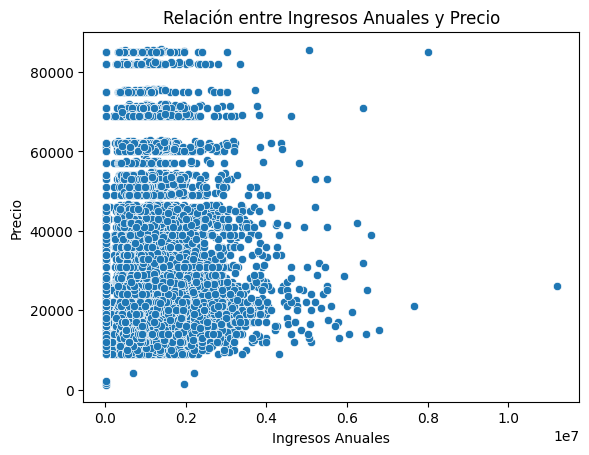

In [22]:
# En éste caso quise utilizar un tipo de grafico scatterplot para ver la relación, sin embargo,
# poco se entiende lo que se está midiendo, de todas formas lo dejo a propósito
sns.scatterplot(data=df, x="Ingreso_Anual", y="Precio")

plt.title("Relación entre Ingresos Anuales y Precio")
plt.xlabel("Ingresos Anuales")
plt.ylabel("Precio")

plt.show()

Se mantuvo éste gráfico, se puede observar que no existe una relación clara entre Annual Income y el Price del vehiculo, aquellos con ingresos menores también están interesados en aquiriri vehiculos de Price elevados, seguramente se enfocan mas en calidad, confort, financiacion, experiencia, etc

In [23]:
df.head(2)

,Identificacion_auto,Fecha,Nombre_Cliente,Genero,Ingreso_Anual,Nombre_vendedor,Compañia,Modelo,Motor,Transmisión,Color,Precio,Número_vendedor,Estilo_vehiculo,Teléfono,Región_vendedor
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


Accuracy: 0.13747908533184608
Precision: 0.1371888717654097
Recall: 0.13747908533184608
F1-Score: 0.1360041456723252


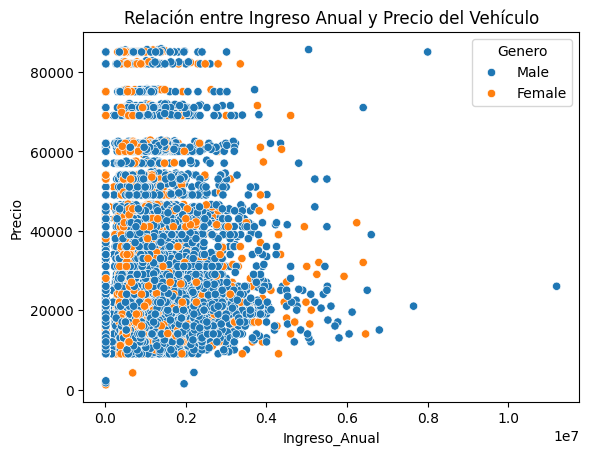

Compañia
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: count, dtype: int64
Genero
Male      18798
Female     5108
Name: count, dtype: int64


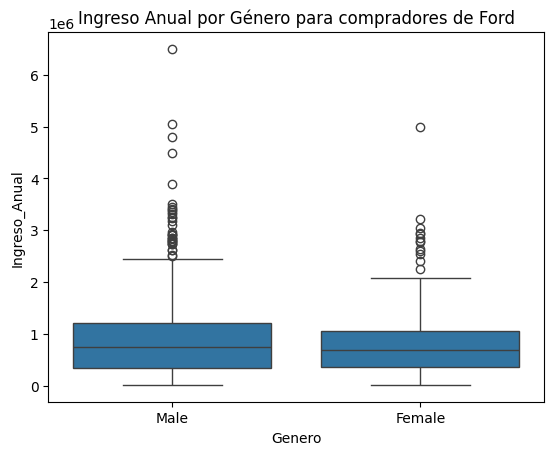

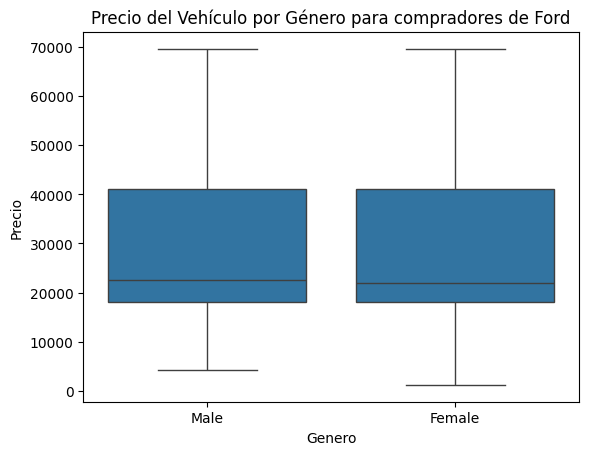

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# Convertir columnas relevantes a tipo adecuado
df['Ingreso_Anual'] = df['Ingreso_Anual'].replace('[\$,]', '', regex=True).astype(float)
df['Precio'] = df['Precio'].replace('[\$,]', '', regex=True).astype(float)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# 2. Selección de características
# Variance Threshold
selector = VarianceThreshold(threshold=0.1)
features = df[['Ingreso_Anual', 'Precio']]  # Ejemplo de características
selected_features = selector.fit_transform(features)

# SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selected_features = selector.fit_transform(features, df['Compañia'])  # Ejemplo usando la compañía como target

# 3. Entrenamiento del modelo
# División de los datos
X = selected_features
y = df['Compañia']  # Usando la compañía como target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Validación del modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# 5. Análisis de hipótesis

# Hipótesis 1: Personas de mayores ingresos compran vehículos más caros
sns.scatterplot(data=df, x='Ingreso_Anual', y='Precio', hue='Genero')
plt.title('Relación entre Ingreso Anual y Precio del Vehículo')
plt.show()

# Hipótesis 2: La compañía que más vendió fue Ford
company_sales = df['Compañia'].value_counts()
print(company_sales)

# Hipótesis 3: Los hombres compran más vehículos que las mujeres
gender_sales = df['Genero'].value_counts()
print(gender_sales)

# Análisis de relación especial para Ford
ford_data = df[df['Compañia'] == 'Ford']
sns.boxplot(data=ford_data, x='Genero', y='Ingreso_Anual')
plt.title('Ingreso Anual por Género para compradores de Ford')
plt.show()

sns.boxplot(data=ford_data, x='Genero', y='Precio')
plt.title('Precio del Vehículo por Género para compradores de Ford')
plt.show()

Conclusiones:

- El modelo demuestra tener una precision del 13,72% siendo bajo, con lo cual se determina que el Ingreso Anual, el Precio del Vehículo o el Genero no influyen al momento de la compra de vehiculos, ya que no hay una predisposición clara en éstos aspectos

- Respecto a las hipótesis se demostró lo siguiente:
  * 1- Las personas de mayores Ingreso **NO** adquieren los vehiculos cuyos precios son mas elevado
  * 2- La Empresa que más vehículos vendió entre el 2022 y 2023 **NO** fué Ford sino que fue Chevrolet
  * 3- Los Hombres si compraron mas vehículos anuales que las Mujeres durantelos periodos 2022 y 2023
  * 4- El color de auto mas vendido fue Blanco
  * 5- Los compradores prefieren vehículos con cualquier tipo de Transmisión ya sea automática o Manual
  * 6- La época donde mas vehículos se adquieren es en Septiembre, Noviembre y Diciembre, no a principios de mes